In [1]:
import operator
from functools import reduce

In [2]:
num_list = [1,2,3,4,5]

result = reduce(operator.add, num_list)
print(result)

15


In [3]:
def product(a, b):
    return a * b

In [4]:
result = reduce(product, num_list)
print(result)

120


In [5]:
def merge(a: list|int|str, b: list|int|str):
    return a + b

In [6]:
merge([1,2,3], [4,5,6])

[1, 2, 3, 4, 5, 6]

In [7]:
merge(50, 10)

60

In [9]:
merge("Hello, ", "How are you?")

'Hello, How are you?'

In [11]:
result = reduce(merge, num_list)
print(result)

15


In [12]:
items = [[1,2], [3,4], [5,6]]
result = reduce(merge, items)
print(result)

[1, 2, 3, 4, 5, 6]


In [13]:
# Implement Reducer which removes duplicates after merge

def merge(a: list, b: list):
    return list (set(a + b)) #set() removes duplicates

In [14]:
items = [[1,2], [3,4], [5,6]]
result = reduce(merge, items)
print(result)

[1, 2, 3, 4, 5, 6]


In [15]:
items = [[1,2,3], [3,4,6], [5,6,7,8]]
result = reduce(merge, items)
print(result)

[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
# converting two lists to a dict -> zip()

a = ['John', 'Harry']
b = [10, 8]
dict(zip(a,b))

{'John': 10, 'Harry': 8}

In [44]:
a = {'name': 'John'}
b = {'age': 10}
c = {'name': 'Harry'}

In [46]:
#merge two dic
print(a)
a.update(c)
print(a)

{'name': 'John', 'age': 10}
{'name': 'Harry', 'age': 10}


In [47]:
def merge(a: dict, b: dict) -> dict:
    a.update(b)
    return a

In [48]:
items = [
    {
        'name': 'John',
        'age': 10
    },
    {
        'city': 'Hyderabad'
    },
    {
        'name': 'Harry'
    }
]

In [49]:
reduce(merge, items)

{'name': 'Harry', 'age': 10, 'city': 'Hyderabad'}

In [ ]:
# reduce() - a function that applies a given operation/ function/ command to all items in an iterable (list/dict/ etc)

In [53]:
def make_empty(a,b) -> dict:
    return {}

In [50]:
def merge(a: dict, b: dict) -> dict:
    b.update(a)
    return b

In [51]:
items = [
    {
        'name': 'John',
        'age': 10
    },
    {
        'city': 'Hyderabad'
    },
    {
        'name': 'Harry'
    }
]

In [52]:
reduce(merge, items)

{'name': 'John', 'city': 'Hyderabad', 'age': 10}

In [54]:
reduce (make_empty, items)

{}

In [55]:
items = [
    {
        'name': 'John', 
    },
    {
        'age': 10
    },
    {
        'city': 'Hyderabad'
    }
]

In [57]:
def merge(a: dict, b: dict) -> dict:
    a.update(b)
    return a

reduce(merge, items)

{'name': 'John', 'age': 10, 'city': 'Hyderabad'}

In [59]:
from langgraph.graph import StateGraph, START, END, MessagesState
from typing import TypedDict, Annotated
from operator import add

In [88]:
class MathState(TypedDict):
    a: int
    b: int
    result_sum: int
    result_diff: int

In [89]:
def add(state: MathState):
    return {"result_add": state['a'] + state ['b']}

def sub(state: MathState):
    return {"result_diff": state['a'] - state ['b']}

In [90]:
math_graph = StateGraph(MathState)

math_graph.add_node("Add", add)
math_graph.add_node("Subtract", sub)

math_graph.add_edge(START, "Add")
math_graph.add_edge("Add", END)

math_graph.add_edge(START, "Subtract")
math_graph.add_edge("Subtract", END)

graph = math_graph.compile()

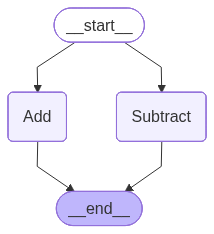

In [91]:
from utils import draw_graph
draw_graph(graph)

In [95]:
result = graph.invoke({"a": 10, "b": 3})

In [96]:
result

{'a': 10, 'b': 3, 'result_diff': 7}